In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.1MB/s 
     |████████████████████████████████| 1.2MB 17.8MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 194kB 40.4MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/')
export_path.ls()

(#4) [Path('/content/gdrive/MyDrive/Colab Notebooks/Untitled0.ipynb'),Path('/content/gdrive/MyDrive/Colab Notebooks/images'),Path('/content/gdrive/MyDrive/Colab Notebooks/bears2'),Path('/content/gdrive/MyDrive/Colab Notebooks/players')]

In [5]:
path = export_path/'players'
path.ls()

(#3) [Path('/content/gdrive/MyDrive/Colab Notebooks/players/Mo Salah'),Path('/content/gdrive/MyDrive/Colab Notebooks/players/ronaldo'),Path('/content/gdrive/MyDrive/Colab Notebooks/players/bill gates')]

## DataLoaders
To turn our downloaded data into a DataLoaders object we need to tell fastai at least four things:
- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set

In [6]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #image->discrete category
    get_items=get_image_files, # path->images
    splitter=RandomSplitter(valid_pct=0.2, seed=42), #how to train-valid split
    get_y=parent_label, # get the label from the directory name
    item_tfms=Resize(128)) # resize to 128x128

In [7]:
# DataBlock is a template to create DataLoaders
dls = bears.dataloaders(path)

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


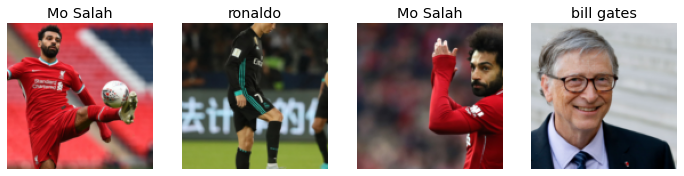

In [8]:
dls.train.show_batch(max_n=4, nrows=1)

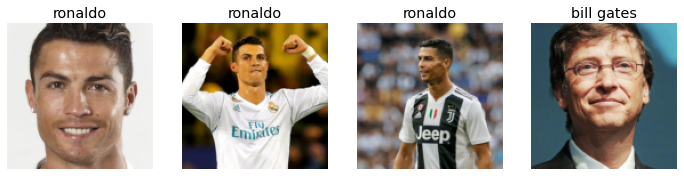

In [9]:
dls.valid.show_batch(max_n=4, nrows=1)

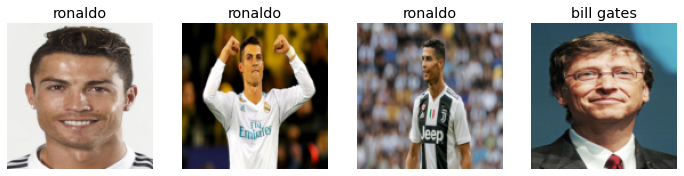

In [10]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

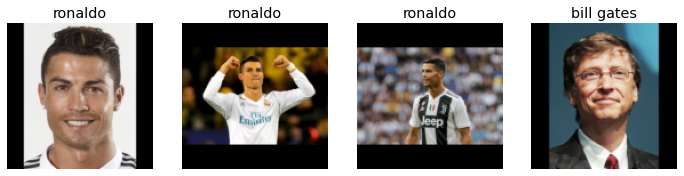

In [11]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

> Instead, what we normally do in practice is to randomly select part of the image, and crop to just that part. On each epoch (which is one complete pass through all of our images in the dataset) we randomly select a different part of each image. This means that our model can learn to focus on, and recognize, different features in our images. It also reflects how images work in the real world: different photos of the same thing may be framed in slightly different ways.

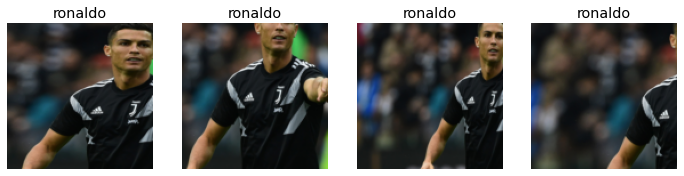

In [12]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

## Data augmentation
`item_tfms` applied to all images prior sending to GPU. Usually to resize to common size  
`batch_tfms` applied to a batch of images on the GPU

`aug_transforms()`  rotation, flipping, perspective warping, brightness changes and contrast changes

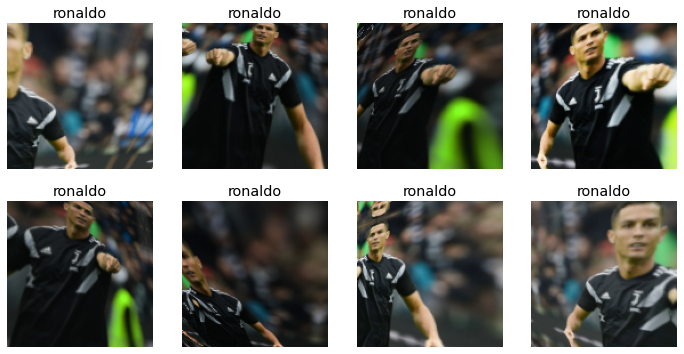

In [13]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [14]:
dls.train_ds

(#364) [(PILImage mode=RGB size=1200x669, TensorCategory(2)),(PILImage mode=RGB size=780x438, TensorCategory(1)),(PILImage mode=RGB size=768x1115, TensorCategory(1)),(PILImage mode=RGB size=1200x700, TensorCategory(2)),(PILImage mode=RGB size=201x250, TensorCategory(0)),(PILImage mode=RGB size=850x510, TensorCategory(0)),(PILImage mode=RGB size=940x529, TensorCategory(0)),(PILImage mode=RGB size=2428x1618, TensorCategory(0)),(PILImage mode=RGB size=1000x541, TensorCategory(2)),(PILImage mode=RGB size=1024x683, TensorCategory(1))...]

In [15]:
dls.train.vocab

['Mo Salah', 'bill gates', 'ronaldo']

In [ ]:
dls.valid_ds

(#81) [(PILImage mode=RGB size=640x360, TensorCategory(1)),(PILImage mode=RGB size=1600x1200, TensorCategory(2)),(PILImage mode=RGB size=1026x1026, TensorCategory(2)),(PILImage mode=RGB size=3249x2285, TensorCategory(0)),(PILImage mode=RGB size=620x387, TensorCategory(0)),(PILImage mode=RGB size=1728x2304, TensorCategory(0)),(PILImage mode=RGB size=310x387, TensorCategory(1)),(PILImage mode=RGB size=1600x1072, TensorCategory(1)),(PILImage mode=RGB size=1512x2016, TensorCategory(2)),(PILImage mode=RGB size=1000x1000, TensorCategory(2))...]

In [ ]:
img = dls.valid_ds[0][0]

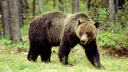

In [ ]:
img.to_thumb(128)